# Certificate in Data Science | Assignment 10 |  
- Sentiment Analysis  

> University of Washington  
> September 2019  
> N. HICKS

## Assignment Instructions  
This assignment requires that you build a sentiment analysis classifier for a series of tweets.
The data consists of a file "twitter_data.csv". The file contains 16,000 tweets with their respective score. The attributes are the sentences, and the score is either 4 (for positive) or 0 (for negative).

Assignment Instructions
1. Complete all questions below.
2. Comment on the applicability of the model on future tweets.  

## Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import qgrid

In [2]:
# import csv
# import lda
# import editdistance
import string
import re
import nltk

In [3]:
# Specialty libraries
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
# from scipy.sparse import coo_matrix
# from collections import Counter
# import argparse
# import pprint
# import gensim

from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NateDogg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NateDogg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Functions for Scripting

In [5]:
# retrieve the prescribed dataset
def fetch_data(path, file):
    filepath = path+file
    try:
        # import the file to a dataframe
        _df = pd.read_csv(filepath, sep=",", index_col=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED; REMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path,file))
    
    return _df

In [6]:
# Create a function to do this
def preprocess(text, list_of_steps):
    
    for step in list_of_steps:
        if step == 'remove_non_ascii':
            text = ''.join([x for x in text if ord(x) < 128])
        elif step == 'lowercase':
            text = text.lower()
        elif step == 'remove_punctuation':
            punct_exclude = set(string.punctuation)
            text = ''.join(char for char in text if char not in punct_exclude)
        elif step == 'remove_numbers':
            text = re.sub("\d+", "", text)
        elif step == 'strip_whitespace':
            text = ' '.join(text.split())
        elif step == 'remove_stopwords':
            stops = stopwords.words('english')
            word_list = text.split(' ')
            text_words = [word for word in word_list if word not in stops]
            text = ' '.join(text_words)
        elif step == 'stem_words':
            lmtzr = WordNetLemmatizer()
            word_list = text.split(' ')
            stemmed_words = [lmtzr.lemmatize(word) for word in word_list]
            text = ' '.join(stemmed_words)
    return text

In [7]:
#Read files
url = 'https://library.startlearninglabs.uw.edu//DATASCI410//Datasets//'
file = 'twitter_data.csv'
twitter_df = fetch_data(url, file)

twitter_df.columns = ['sentiment_label', 'tweet_text']

print(twitter_df.head())

LOCAL FILE USED; REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)


   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


## Tokenize the Tweets / Text

In [8]:
# Change the existing SENTIMENT labeled as '4' to '1'
# to assert positive or negative sentiment.
twitter_df.sentiment_label = twitter_df.sentiment_label.replace(4,1)

# Check the Data frame again
print(twitter_df.head())
print('\n\n{}'.format(twitter_df['sentiment_label'].describe()))
print('\n\n Count of positives: {}'.format(np.sum(twitter_df['sentiment_label'])))

   sentiment_label                                         tweet_text
0                1  @elephantbird Hey dear, Happy Friday to You  A...
1                1  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


count    160000.000000
mean          0.500000
std           0.500002
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: sentiment_label, dtype: float64


 Count of positives: 80000


In [9]:
# Convert a copy of the tweets as list for use later
tweet_data = twitter_df.values.tolist()

In [10]:
twitter_df.head()

,sentiment_label,tweet_text
0,1,"@elephantbird Hey dear, Happy Friday to You A..."
1,1,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


## Cleanup the Text Entries

In [11]:
# Clean the tweets
steps = ['remove_stopwords', 'lowercase', 'remove_punctuation', 'remove_numbers', 'strip_whitespace']
twitter_df['clean_tweet'] = twitter_df['tweet_text'].map(lambda s: preprocess(s, steps))

## Question Responses

In [12]:
# REF: https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 7]   # set for all notebook; width, height of the resulting plots
sns.set()

### Question 01  
> Generate a word cloud for positive sentiment.

In [13]:
positive = twitter_df['sentiment_label']==1
pos_df = twitter_df[positive]
pos_texts_df = pos_df['clean_tweet']
text = " ".join(review for review in pos_texts_df)
print(text[0:500])

elephantbird hey dear happy friday you already rices bowl lunch ughhh layin downnnn waiting zeina cook breakfast with god ur side anything possible video vh much better u tube one ashleyltmsyf hey ashley hush hush hush hush video out cant wait scratch i enjoy seein people left college came back summer makes chuckle demisuperfan hey im good sorry took long reply im chillin listening music wbu lydiajohn good morning youre early chilling chomping far how yours and training joni omggg lol saw trendi


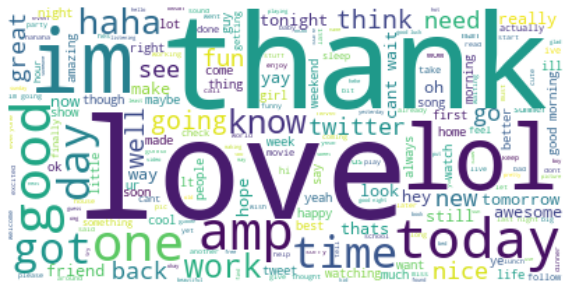

In [14]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Question 02  
> Generate a word cloud for negative sentiment.

In [15]:
negative = twitter_df['sentiment_label']==0
neg_df = twitter_df[negative]
neg_texts_df = neg_df['clean_tweet']

text = " ".join(review for review in neg_texts_df)
print(text[0:500])

greeniebach i reckon hell play even hes but know nothing it without him valewee i know saw news sad httpwwwfabchannelcom closed down one web services ive used years fearnecotton sings i remember alwaysss hear radio never catch artist lovesmrs stupid having delved back guts expression engine flexible cms use dev great clients though emoskank awww take you ran champagne wonder call brother could convince bring bottle carolinefjones i wish i going show tonight doing homeworkthen bedwaking gonna awf


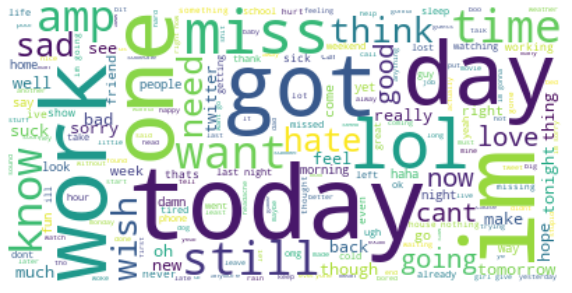

In [16]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Question 03  
> Split data into 70% for training and 30% for testing.

In [17]:
# Declare the TFIDF vectorizer.
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, max_features=6228, stop_words='english')

# Fit the vectorizer over the dataset
clean_texts = twitter_df['clean_tweet']
tf_idf_tweets = vectorizer.fit_transform(clean_texts)

In [18]:
from sklearn.model_selection import train_test_split
print('Splitting into train-test...')

y_targets = np.array([y[0] for y in tweet_data])

X_train, X_test, y_train, y_test = train_test_split(tf_idf_tweets,
                                                    y_targets,
                                                    test_size=0.30,
                                                    random_state=42)

print('Done!')
print('\nTraining & Testing Sets:\n {}%      {}%'.format((X_train.shape[0]/len(tweet_data))*100,
                                                  ((X_test.shape[0]/len(tweet_data))*100)))

Splitting into train-test...
Done!

Training & Testing Sets:
 70.0%      30.0%


### Question 04  
> Build a classifier that classifies the sentiment of a sentence.

In [19]:
from sklearn.linear_model import LogisticRegression

print('Starting a standard Logistic Model training!')
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Done.')

Starting a standard Logistic Model training!


C:\Users\NateDogg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done.


In [20]:
# the linear regression classifier model
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Question 05  
> What is the accuracy of your model when applied to testing data?

In [21]:
## Compute results on the train and test set
train_probs = lr.predict_proba(X_train)
train_results = np.argmax(train_probs, axis=1)

test_probs = lr.predict_proba(X_test)
test_results = np.argmax(test_probs, axis=1)

In [29]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Compute accuracies
train_logical_correct = [pred == actual for pred, actual in zip(train_results, y_train)]
train_acc = np.mean(train_logical_correct)

test_logical_correct = [pred == actual for pred, actual in zip(test_results, y_test)]
test_acc = np.mean(test_logical_correct)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy:  {}'.format(test_acc))

Train accuracy: 0.7765625
Test accuracy:  0.75075


> Compute precision, recall and F-score.

In [23]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Remember:
# Precision is the proportion of correct predictions among all predicted
# Recall (sensitivity) is the proportion of correct predictions among all true actual examples
# F1 is the harmonic average of precision and recall
# Support is count of actual cases of specific class
# Here, each of the following is a pair of numbers, the first is for class 1 ('1') and second for class 0 ('0')
precision, recall, f1, support = precision_recall_fscore_support(y_test, test_results)

# Get the parts of the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, test_results).ravel()

# Print results
print(confusion_matrix(y_test, test_results))
print('='*35)
print('             Class 1   -   Class 0')
print('Precision: {}'.format(precision))
print('Recall   : {}'.format(recall))
print('F1       : {}'.format(f1))
print('Support  : {}'.format(support))

[[17351  6693]
 [ 5271 18685]]
             Class 1   -   Class 0
Precision: [0.76699673 0.73626763]
Recall   : [0.72163534 0.77997161]
F1       : [0.74362491 0.75748976]
Support  : [24044 23956]


### Question 06  
> What conclusions can you draw from the model?

1) By observation of the accuracy results, the trained model is slightly overfit because the values are higher than the test accuracy results.  
<br>
2) Improvements are achieved by utilizing the Elastic-net Regularization approach, or Stochastic Gradient Descent, as further shown below.

In [27]:
print('Starting training regularized logistic regression')
from sklearn.linear_model import SGDClassifier
lr_reg = SGDClassifier(loss='log', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15)
lr_reg.fit(X_train, y_train)
print('Done!')

Starting training regularized logistic regression
Done!


In [28]:
# Look at model object
lr_reg

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
## Compute results on the train and test set
train_probs = lr_reg.predict_proba(X_train)
train_results = np.argmax(train_probs, axis=1)

test_probs = lr_reg.predict_proba(X_test)
test_results = np.argmax(test_probs, axis=1)

In [31]:
# Compute accuracies
train_logical_correct = [pred == actual for pred, actual in zip(train_results, y_train)]
train_acc = np.mean(train_logical_correct)

test_logical_correct = [pred == actual for pred, actual in zip(test_results, y_test)]
test_acc = np.mean(test_logical_correct)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.7489642857142857
Test accuracy: 0.7428333333333333


In [32]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, test_results)

# Get the parts of the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, test_results).ravel()

# Print results
print(confusion_matrix(y_test, test_results))
print('='*35)
print('             Class 1   -   Class 0')
print('Precision: {}'.format(precision))
print('Recall   : {}'.format(recall))
print('F1       : {}'.format(f1))
print('Support  : {}'.format(support))

[[17002  7042]
 [ 5302 18654]]
             Class 1   -   Class 0
Precision: [0.76228479 0.72594956]
Recall   : [0.70712028 0.77867758]
F1       : [0.73366704 0.75138967]
Support  : [24044 23956]


### Question 07  
> Is it better to have a model per source?

1) Assuming that the term 'source' is in relation to each tweet, I believe that constructing such a model is erroneous.  
<br>
2) If on the other hand, the term 'source' refers to a tweet of positive or negative sentiment, then perhaps constructing a unique model in this way could provide some benefit. However, as shown above with the resultant accuracies, a single model for both sentiment types appears sufficient for meeting the intent of prediction. 

### Question 08  
> Comment on the applicability of the model on future tweets.

1) The established model, based upon the provided accuracies and performance outcomes, is expected to predict sentiments relatively well.  
<br>
2) However, if the sentiment of tweets changes such that the underlying corpus contains varying unseen tokens without updating the model, then the predictions are expected to fall short of expectations.

## Extra Credit - Establish a Document-Text-Matrix  
> This method is likely limited by available on-board memory of the executing cpu.

In [24]:
# Create the vocabulary
vocab = set()
texts_df = twitter_df['clean_tweet']

for text in texts_df.values:
    words = text.split(' ')
    vocab.update(set(words))

# fix the set as a list
vocab_list = list(vocab)

# Total file amount
total_tokens = len(vocab_list)

print('VOCABULARY SIZE\nUnique Words: {}'.format(total_tokens))
print('Total Tweets: {}\n'.format(len(texts_df.values)))

VOCABULARY SIZE
Unique Words: 151664
Total Tweets: 160000



In [26]:
# REF: https://help.clarifai.com/en/articles/705264-batch-processing-with-python
# ATTEMPT TO BATCH PROCESS THE DTM

# Counter variables
index = 0
counter = 0
batch_size = 500

# Batch DTM
d_t_matrix = np.empty((0, len(vocab)))

while (counter < total_tokens):
    print("\nProcessing batch {} of {}\n{}".format(index + 1, int(total_tokens/batch_size+1), '='*35))
    
    # Set the range limit
    if total_tokens > counter + batch_size:
        range_limit = counter + batch_size
    else:
        range_limit = total_tokens - counter
        batch_size = range_limit
        
    tokens = texts_df.iloc[counter:range_limit].values
    for text in tokens:
        words = text.split(' ')
        vocab.update(set(words))
    
    # fix the set as a list
    vocab_list = list(vocab)
    
    for doc_ix_col, text in enumerate(tokens):
        # establish a list of tokens
        text_words = text.split(' ')
        
        # this is a Term-Document-Matrix
        token_list = np.zeros((len(vocab), batch_size), dtype = np.intc)

        # return the index of the word from within the corpus
        row_ixs = [vocab_list.index(word) for word in text_words if word in vocab_list]

        token_list[row_ixs, doc_ix_col] = 1
        if (doc_ix_col+1)==batch_size:   # this is the last iteration check
            token_list = token_list.T
            d_t_matrix = np.append(d_t_matrix, token_list, axis=0)
    print('DTM Size: {}'.format(len(d_t_matrix)))

    counter=counter+batch_size
    index=index+1
print('Done!')


Processing batch 1 of 304
500

Processing batch 2 of 304
1000

Processing batch 3 of 304
1500

Processing batch 4 of 304
2000

Processing batch 5 of 304
2500

Processing batch 6 of 304
3000

Processing batch 7 of 304
3500

Processing batch 8 of 304


MemoryError: 